In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
weather_path = "../data/HourlyWeatherData.csv"
weatherDF = pd.read_csv(weather_path)
weatherDF


,DATE,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyRelativeHumidity
0,2017-07-01T00:54:00,75.0,0.0,88.0
1,2017-07-01T01:54:00,76.0,0.0,88.0
2,2017-07-01T02:54:00,75.0,0.0,90.0
3,2017-07-01T03:54:00,75.0,0.0,90.0
4,2017-07-01T04:54:00,75.0,0.0,90.0
...,...,...,...,...
36307,2021-08-22T22:54:00,73.0,0.0,87.0
36308,2021-08-22T23:54:00,71.0,0.0,96.0
36309,2021-08-23T00:54:00,72.0,0.0,94.0
36310,2021-08-23T01:54:00,71.0,NaN,96.0


In [3]:
weatherDF['DATE'] = pd.to_datetime(weatherDF['DATE'])
weatherDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36312 entries, 0 to 36311
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATE                      36312 non-null  datetime64[ns]
 1   HourlyDryBulbTemperature  36310 non-null  float64       
 2   HourlyPrecipitation       36109 non-null  float64       
 3   HourlyRelativeHumidity    36310 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.1 MB


In [4]:
# Subtract minutes to get hour values on weather table
weatherDF['DATE'] = weatherDF['DATE'] - dt.timedelta(minutes = 54)
weatherDF

,DATE,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyRelativeHumidity
0,2017-07-01 00:00:00,75.0,0.0,88.0
1,2017-07-01 01:00:00,76.0,0.0,88.0
2,2017-07-01 02:00:00,75.0,0.0,90.0
3,2017-07-01 03:00:00,75.0,0.0,90.0
4,2017-07-01 04:00:00,75.0,0.0,90.0
...,...,...,...,...
36307,2021-08-22 22:00:00,73.0,0.0,87.0
36308,2021-08-22 23:00:00,71.0,0.0,96.0
36309,2021-08-23 00:00:00,72.0,0.0,94.0
36310,2021-08-23 01:00:00,71.0,NaN,96.0


In [5]:
salespath = "../data/HourlySalesFullNoCovid.csv" 
salesDF = pd.read_csv(salespath)
salesDF["Business Hour"] = salesDF["Business Hour"].str[:8]


In [6]:
salesDF['DateTime'] = pd.to_datetime(salesDF['Business Date'] + " " + salesDF['Business Hour'])
salesDF = salesDF.replace(',','', regex=True)
salesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58237 entries, 0 to 58236
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Business Date  58237 non-null  object        
 1   Business Hour  58237 non-null  object        
 2   Sales          58237 non-null  object        
 3   Checks         58237 non-null  int64         
 4   DateTime       58237 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 2.2+ MB


In [7]:
salesDF['Sales']= salesDF['Sales'].apply(pd.to_numeric,errors='coerce')

In [8]:
salesDF = salesDF.drop(['Business Date','Business Hour'], axis=1)

In [9]:
groupedSalesDF = salesDF.groupby(['DateTime']).sum()
groupedSalesDF.reset_index(level=0, inplace=True)

In [10]:
WeatherSalesDF = groupedSalesDF.merge(weatherDF, how="inner", left_on="DateTime", right_on= "DATE")
WeatherSalesDF = WeatherSalesDF.drop(['DATE'], axis=1)
WeatherSalesDF

,DateTime,Sales,Checks,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyRelativeHumidity
0,2017-07-01 11:00:00,34.98,6,86.0,0.0,65.0
1,2017-07-01 12:00:00,69.36,10,86.0,0.0,65.0
2,2017-07-01 13:00:00,72.88,6,90.0,0.0,59.0
3,2017-07-01 14:00:00,84.89,12,90.0,0.0,58.0
4,2017-07-01 15:00:00,103.16,5,89.0,0.0,57.0
...,...,...,...,...,...,...
15520,2021-06-29 14:00:00,87.02,15,92.0,0.0,46.0
15521,2021-06-29 15:00:00,92.81,13,92.0,0.0,47.0
15522,2021-06-29 16:00:00,116.08,17,91.0,0.0,45.0
15523,2021-06-29 17:00:00,253.88,23,90.0,0.0,44.0


In [11]:
WeatherSalesDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15525 entries, 0 to 15524
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DateTime                  15525 non-null  datetime64[ns]
 1   Sales                     15525 non-null  float64       
 2   Checks                    15525 non-null  int64         
 3   HourlyDryBulbTemperature  15525 non-null  float64       
 4   HourlyPrecipitation       15435 non-null  float64       
 5   HourlyRelativeHumidity    15525 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 849.0 KB


In [12]:
WeatherSalesDF['Day of Week'] = WeatherSalesDF["DateTime"].dt.dayofweek
WeatherSalesDF['Month'] = WeatherSalesDF["DateTime"].dt.month
WeatherSalesDF['Year'] = WeatherSalesDF["DateTime"].dt.year
WeatherSalesDF['Quarter'] = WeatherSalesDF["DateTime"].dt.to_period('Q-JUN')
WeatherSalesDF['FY'] = WeatherSalesDF["Quarter"].dt.qyear
WeatherSalesDF['Week Number'] = WeatherSalesDF["DateTime"].dt.isocalendar().week
WeatherSalesDF = WeatherSalesDF.drop(["Year"], axis=1)
WeatherSalesDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15525 entries, 0 to 15524
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DateTime                  15525 non-null  datetime64[ns]
 1   Sales                     15525 non-null  float64       
 2   Checks                    15525 non-null  int64         
 3   HourlyDryBulbTemperature  15525 non-null  float64       
 4   HourlyPrecipitation       15435 non-null  float64       
 5   HourlyRelativeHumidity    15525 non-null  float64       
 6   Day of Week               15525 non-null  int64         
 7   Month                     15525 non-null  int64         
 8   Quarter                   15525 non-null  period[Q-JUN] 
 9   FY                        15525 non-null  int64         
 10  Week Number               15525 non-null  UInt32        
dtypes: UInt32(1), datetime64[ns](1), float64(4), int64(4), period[Q-JUN](1)
memory u

In [13]:
WeatherSalesDF["Sales"].describe(percentiles = [.2,.4,.6,.8])

count    15525.000000
mean       450.926263
std        318.799840
min         -1.300000
20%        125.094000
40%        359.450000
50%        444.550000
60%        520.602000
80%        701.838000
max       3760.790000
Name: Sales, dtype: float64

In [14]:
bins = [-1.300000, 125.094000, 359.450000, 444.550000, 520.602000, 701.838000, 3760.790000]
group_names = [0, 20, 40, 60, 80, 100]
WeatherSalesDF["Percentile"] = pd.cut(WeatherSalesDF['Sales'], bins, labels=group_names, include_lowest=True)
WeatherSalesDF

,DateTime,Sales,Checks,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyRelativeHumidity,Day of Week,Month,Quarter,FY,Week Number,Percentile
0,2017-07-01 11:00:00,34.98,6,86.0,0.0,65.0,5,7,2018Q1,2018,26,0
1,2017-07-01 12:00:00,69.36,10,86.0,0.0,65.0,5,7,2018Q1,2018,26,0
2,2017-07-01 13:00:00,72.88,6,90.0,0.0,59.0,5,7,2018Q1,2018,26,0
3,2017-07-01 14:00:00,84.89,12,90.0,0.0,58.0,5,7,2018Q1,2018,26,0
4,2017-07-01 15:00:00,103.16,5,89.0,0.0,57.0,5,7,2018Q1,2018,26,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15520,2021-06-29 14:00:00,87.02,15,92.0,0.0,46.0,1,6,2021Q4,2021,26,0
15521,2021-06-29 15:00:00,92.81,13,92.0,0.0,47.0,1,6,2021Q4,2021,26,0
15522,2021-06-29 16:00:00,116.08,17,91.0,0.0,45.0,1,6,2021Q4,2021,26,0
15523,2021-06-29 17:00:00,253.88,23,90.0,0.0,44.0,1,6,2021Q4,2021,26,20


<AxesSubplot:ylabel='Frequency'>

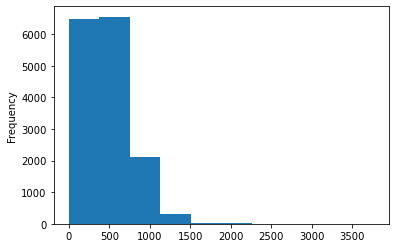

In [15]:
WeatherSalesDF["Sales"].plot(kind='hist')

In [ ]:
Weather

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
data = WeatherSalesDF.drop('Quarter', axis=1)
data = data.drop('Sales', axis=1)
data = data.drop('DateTime', axis=1)
data = data.drop('Percentile', axis=1)
data = data.drop('Checks', axis=1)
# Dropping datetime Cats here
data = data.drop('FY', axis=1)
data = data.drop('Month', axis=1)
feature_names = []
for column in data.columns:
    feature_names.append(column)
    
target = WeatherSalesDF['Percentile']

In [23]:
feature_names

['HourlyDryBulbTemperature',
 'HourlyPrecipitation',
 'HourlyRelativeHumidity',
 'Day of Week',
 'Week Number']

In [30]:
data.dtypes()

TypeError: 'Series' object is not callable

In [24]:
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder
# define one hot encoding
encoder = OneHotEncoder(sparse=False)
# transform data
onehot = encoder.fit_transform(data)
print(onehot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [26]:
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').